<a href="https://colab.research.google.com/github/S-Anbarasu7/git/blob/main/%20Car%20Price%20Analysis%20%26%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [3]:
from google.colab import files
uploaded = files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment.csv


In [4]:
df = pd.read_csv("CarPrice_Assignment.csv")
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
## Data Cleaning
df.info()
df.isnull().sum()  # Check missing values

# Drop ID column
df.drop('car_ID', axis=1, inplace=True)

# Extract car brand from CarName
df['CarName'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())

# Fix common brand typos
df['CarName'].replace({'vw':'volkswagen', 'vokswagen':'volkswagen',
                       'toyouta':'toyota', 'Nissan':'nissan',
                       'maxda':'mazda', 'porcshce':'porsche'}, inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

/tmp/ipython-input-1119116209.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CarName'].replace({'vw':'volkswagen', 'vokswagen':'volkswagen',


In [ ]:
#Exploratory data Analysis

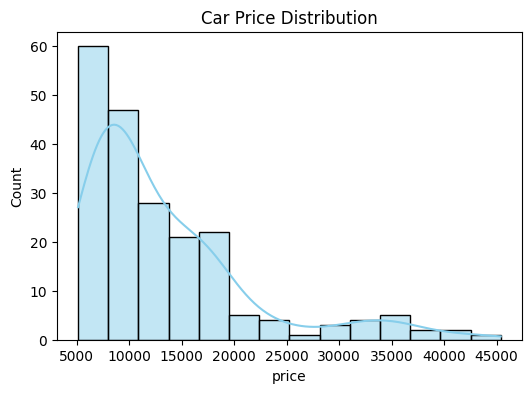

In [6]:
#Price distribution

plt.figure(figsize=(6,4))
sns.histplot(df['price'], kde=True, color='skyblue')
plt.title("Car Price Distribution")
plt.show()


/tmp/ipython-input-1790065074.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_avg.index, y=brand_avg.values, palette="viridis")


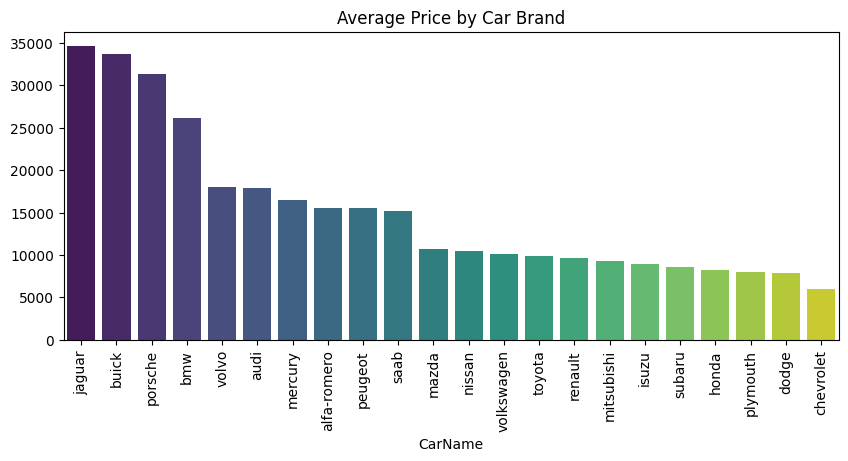

In [7]:
# Brand vs Average Price

brand_avg = df.groupby('CarName')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,4))
sns.barplot(x=brand_avg.index, y=brand_avg.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Average Price by Car Brand")
plt.show()


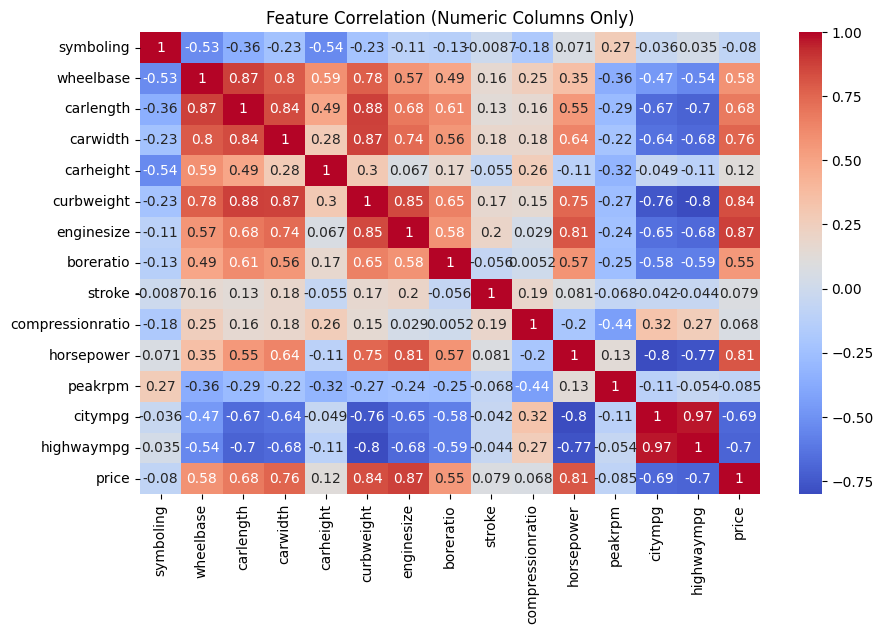

In [9]:
# Correlation heatmap

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation (Numeric Columns Only)")
plt.show()


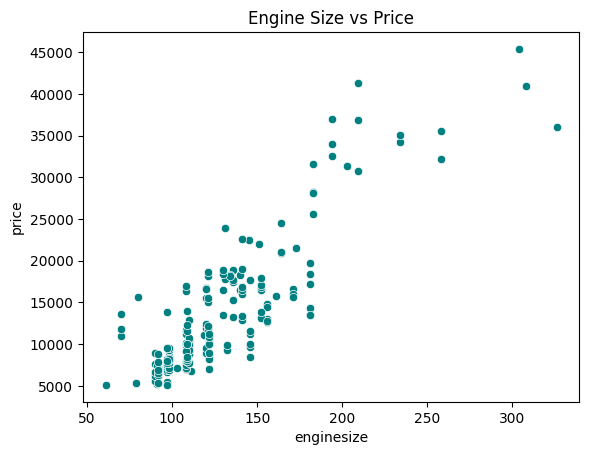

In [10]:
# Engine Size VS Price

sns.scatterplot(x='enginesize', y='price', data=df, color='teal')
plt.title("Engine Size vs Price")
plt.show()


Prepare Data for Model

In [12]:
features = ['enginesize', 'horsepower', 'curbweight', 'highwaympg']
target = 'price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train the model

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))


R² Score: 0.8180061666029927
Mean Absolute Error: 2747.918007387287


In [ ]:
Visualize Predection

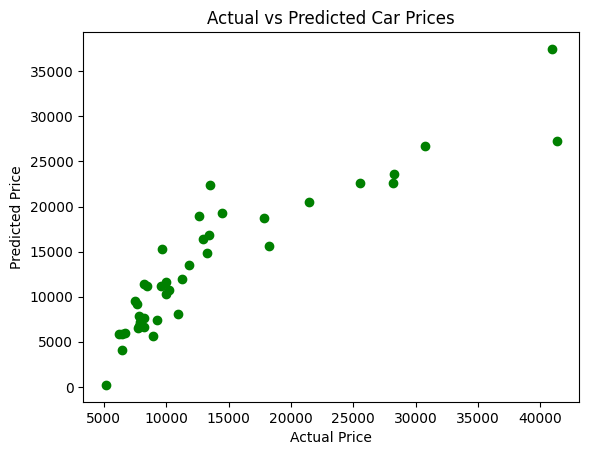

In [14]:
plt.scatter(y_test, y_pred, color='green')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()
